<h1>Dados Covid-19</h1>
<p>Objetivos:</p>
<ul>
  <li>Análise exploratória de dados da Covid-19.</li>
  <li>Obtenção de dados dos municípios do estado do Rio de Janeiro.</li>
  <li>Transformação dos dados em séries temporais.</li>
</ul>
<p>Dados obtidos do site <a href="https://brasil.io">Brasil.io</a>. O qual disponibiliza não apenas os dados como também documentação, diversas visualizações dos dados, uma API de acesso, código fonte de tudo além de boa documentação.</p>
<p>URL direta dos dados: <a href="https://brasil.io/dataset/covid19/files/">https://brasil.io/dataset/covid19/files/</a>.</p>
<p>Data de download: 02/03/2021</p>

<p>Carga dos dados.</p>

In [1]:
arquivo <- "caso.csv"

if (! file.exists(arquivo)) {
  url <- "https://data.brasil.io/dataset/covid19/caso.csv.gz"
  download.file(url, destfile = arquivo, method = "curl")
  untar('caso.csv.gz')
}

dados <- read.csv(arquivo, header = TRUE,stringsAsFactors = FALSE)

<p>Os dados já vem com um cabeçalho, o que ajuda muito!</p>
<p>No github referente ao site <a href="https://brasil.io">Brasil.io</a>, existe documentação relacionada aos dados, a qual reproduzo logo abaixo. Quem quiser pode acessar a documentação original clicando <a href="https://github.com/turicas/covid19-br/blob/master/api.md#casos">aqui</a>.</p>
<p>Colunas:</p>
<ul>
<li>date: data de coleta dos dados no formato YYYY-MM-DD.</li>
<li>state: sigla da unidade federativa, exemplo: SP.</li>
<li>city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).</li>
<li>place_type: tipo de local que esse registro descreve, pode ser city ou state.</li>
<li>order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.</li>
<li>is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).</li>
<li>city_ibge_code: código IBGE do local.</li>
<li>confirmed: número de casos confirmados.</li>
<li>deaths: número de mortes.</li>
<li>estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).</li>
<li>estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.</li>
<li>confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).</li>
<li>death_rate: taxa de mortalidade (mortes / confirmados).</li>
</ul>
<p>Ainda assim, vamos fazer uma análise exploratória:</p>

<p>Vejamos algumas linhas das informações que ele traz.</p>

In [2]:
head(dados)

date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
2021-03-01,AP,,state,83885,1142,343,True,845731,861773,16,9734.002,0.0136
2021-02-28,AP,,state,83663,1140,342,False,845731,861773,16,9708.241,0.0136
2021-02-27,AP,,state,83505,1139,341,False,845731,861773,16,9689.907,0.0136
2021-02-26,AP,,state,83279,1136,340,False,845731,861773,16,9663.682,0.0136
2021-02-25,AP,,state,83062,1135,339,False,845731,861773,16,9638.501,0.0137
2021-02-24,AP,,state,82868,1131,338,False,845731,861773,16,9615.989,0.0136


In [3]:
tail(dados)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1554039,2020-06-24,SP,Óleo,city,1,0,6,False,2496,2471,3533809,40.46945,0
1554040,2020-06-23,SP,Óleo,city,1,0,5,False,2496,2471,3533809,40.46945,0
1554041,2020-06-22,SP,Óleo,city,1,0,4,False,2496,2471,3533809,40.46945,0
1554042,2020-06-21,SP,Óleo,city,1,0,3,False,2496,2471,3533809,40.46945,0
1554043,2020-06-20,SP,Óleo,city,1,0,2,False,2496,2471,3533809,40.46945,0
1554044,2020-06-19,SP,Óleo,city,1,0,1,False,2496,2471,3533809,40.46945,0


<p>Informações básicas sobre os atributos do conjunto de dados:</p>

In [4]:
str(dados)

'data.frame':	1554044 obs. of  13 variables:
 $ date                          : chr  "2021-03-01" "2021-02-28" "2021-02-27" "2021-02-26" ...
 $ state                         : chr  "AP" "AP" "AP" "AP" ...
 $ city                          : chr  "" "" "" "" ...
 $ place_type                    : chr  "state" "state" "state" "state" ...
 $ confirmed                     : int  83885 83663 83505 83279 83062 82868 82606 82374 82018 81874 ...
 $ deaths                        : int  1142 1140 1139 1136 1135 1131 1127 1125 1121 1121 ...
 $ order_for_place               : int  343 342 341 340 339 338 337 336 335 334 ...
 $ is_last                       : chr  "True" "False" "False" "False" ...
 $ estimated_population_2019     : int  845731 845731 845731 845731 845731 845731 845731 845731 845731 845731 ...
 $ estimated_population          : int  861773 861773 861773 861773 861773 861773 861773 861773 861773 861773 ...
 $ city_ibge_code                : int  16 16 16 16 16 16 16 16 16 16 ...
 $ c

<p>Sumarizando os dados temos informações mais detalhadas sobre cada um dos atributos:</p>
<ul>
    <li><i>city</i> possui 9453 registros com este atributo vazio (são dados dos estados) e 5774 registros com o valor <i>Importados/Indefinidos</i>.</li>
    <li><i>confirmed</i> e <i>deaths</i> possuem valores baixos (amém), com mediana baixa, média maior (possívelmente puxada para cima por conta do valor máximo).</li>
    <li>As colunas de população estimada <i>estimated_population</i> e a coluna <i>city_ibge_code</i> possuem o mesmo número de valores <i>NA</i> (not available). Isso acaba refletindo na coluna <i>confirmed_per_100k_inhabitants</i>. Os <i>NA</i> devem ser para cidades novas, que não apareciam no censo do IBGE e também para os <i>Importados/Indefinidos</i> da coluna <i>city</i>.</li>
    <li>Os dados fazem sentido. Os campos <i>confirmed</i>, <i>deaths</i>, <i>estimated_population_2019</i>, <i>estimated_population</i>, <i>confirmed_per_100k_inhabitants</i> e <i>death_rate</i> tem valores maiores ou iguais a zero (afora os <i>NA</i>)</li>
</ul>  

In [5]:
summary(dados)

     date              state               city            place_type       
 Length:1554044     Length:1554044     Length:1554044     Length:1554044    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   confirmed           deaths         order_for_place   is_last         
 Min.   :      0   Min.   :    0.00   Min.   :  1.0   Length:1554044    
 1st Qu.:     29   1st Qu.:    0.00   1st Qu.: 70.0   Class :character  
 Median :    130   Median :    2.00   Median :139.0   Mode  :character  
 Mean   :   1780   Mean   :   50.18   Mean   :141.6                     
 3rd Qu.:    467   

<p>Vamos manter apenas os dados dos municípios do estado do Rio de Janeiro:</p>

In [6]:
dados <- dados[dados$state == "RJ" & dados$place_type == "city", ]

<p>Existem NAs?</p>

In [7]:
any(is.na(dados))

[1] TRUE

<p>Em que coluna?</p>

In [8]:
colSums(is.na(dados))

date                          state 
                             0                              0 
                          city                     place_type 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
     estimated_population_2019           estimated_population 
                           337                            337 
                city_ibge_code confirmed_per_100k_inhabitants 
                           337                            416 
                    death_rate 
                             0

<p>Vamos ver:</p>

In [9]:
dados[is.na(dados$estimated_population), ]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
837588,2021-02-24,RJ,Importados/Indefinidos,city,0,0,337,True,NA,NA,NA,NA,0
837589,2021-02-23,RJ,Importados/Indefinidos,city,0,0,336,False,NA,NA,NA,NA,0
837590,2021-02-22,RJ,Importados/Indefinidos,city,0,0,335,False,NA,NA,NA,NA,0
837591,2021-02-21,RJ,Importados/Indefinidos,city,0,0,334,False,NA,NA,NA,NA,0
837592,2021-02-20,RJ,Importados/Indefinidos,city,0,0,333,False,NA,NA,NA,NA,0
837593,2021-02-19,RJ,Importados/Indefinidos,city,0,0,332,False,NA,NA,NA,NA,0
837594,2021-02-18,RJ,Importados/Indefinidos,city,0,0,331,False,NA,NA,NA,NA,0
837595,2021-02-17,RJ,Importados/Indefinidos,city,0,0,330,False,NA,NA,NA,NA,0
837596,2021-02-16,RJ,Importados/Indefinidos,city,0,0,329,False,NA,NA,NA,NA,0
837597,2021-02-15,RJ,Importados/Indefinidos,city,0,0,328,False,NA,NA,NA,NA,0


<p>Ah, esqueci de retirar os os <i>Importados/Indefinidos</i>:</p>

In [10]:
dados <- dados[dados$city != "Importados/Indefinidos", ]

<p>Ainda existem NAs?</p>

In [11]:
any(is.na(dados))

[1] TRUE

<p>Que chato! Em que coluna?</p>

In [12]:
colSums(is.na(dados))

date                          state 
                             0                              0 
                          city                     place_type 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
     estimated_population_2019           estimated_population 
                             0                              0 
                city_ibge_code confirmed_per_100k_inhabitants 
                             0                             79 
                    death_rate 
                             0

<p>Vamos dar uma olhada:</p>

In [13]:
dados[is.na(dados$confirmed_per_100k_inhabitants), ]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
838877,2020-04-30,RJ,Italva,city,0,0,4,False,15207,15299,3302056,NA,0
838878,2020-04-29,RJ,Italva,city,0,0,3,False,15207,15299,3302056,NA,0
838879,2020-04-28,RJ,Italva,city,0,0,2,False,15207,15299,3302056,NA,0
841038,2020-05-07,RJ,Macuco,city,0,0,15,False,5599,5623,3302452,NA,0
841039,2020-05-06,RJ,Macuco,city,0,0,14,False,5599,5623,3302452,NA,0
841040,2020-05-05,RJ,Macuco,city,0,0,13,False,5599,5623,3302452,NA,0
841041,2020-05-04,RJ,Macuco,city,0,0,12,False,5599,5623,3302452,NA,0
841042,2020-05-03,RJ,Macuco,city,0,0,11,False,5599,5623,3302452,NA,0
841043,2020-05-02,RJ,Macuco,city,0,0,10,False,5599,5623,3302452,NA,0
841044,2020-05-01,RJ,Macuco,city,0,0,9,False,5599,5623,3302452,NA,0


<p>Não parece que isso vai atrapalhar em nada. Ao que parece o atributo <i>confirmed_per_100k_inhabitants</i> ficou com valor <i>NA</i> sempre que <i>confirmed</i> tem o valor 0 (zero). Vamos confirmar:</p>

In [14]:
nrow(dados[is.na(dados$confirmed_per_100k_inhabitants), ]) == nrow(dados[dados$confirmed == 0, ])

[1] TRUE

<p>Qual o máximo de mortes e os dados de onde ocorreu?</p>

In [15]:
dados[dados$deaths == max(dados$deaths), ]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
850348,2021-02-24,RJ,Rio de Janeiro,city,205932,18638,344,True,6718903,6747815,3304557,3051.832,0.0905


<p>Vamos plotar alguns gráficos.</p>
<p>Primeiro carregando a biblioteca necessária:</p>

In [16]:
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<p>Agora sim o gráfico:</p>

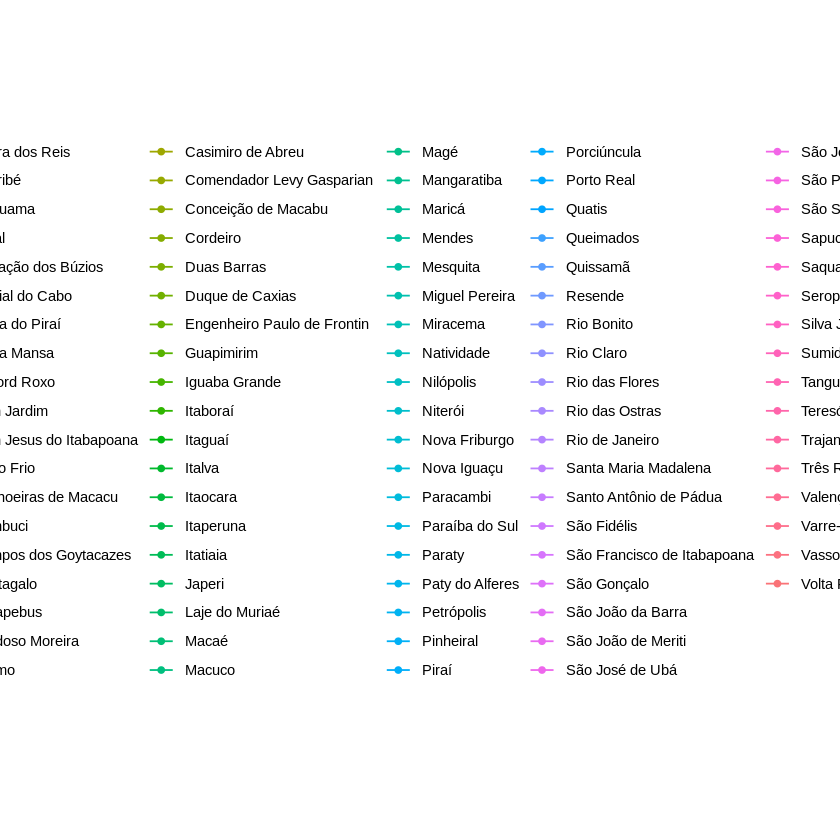

In [17]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muita coisa para um só gráfico. Vamos remover a legenda.</p>

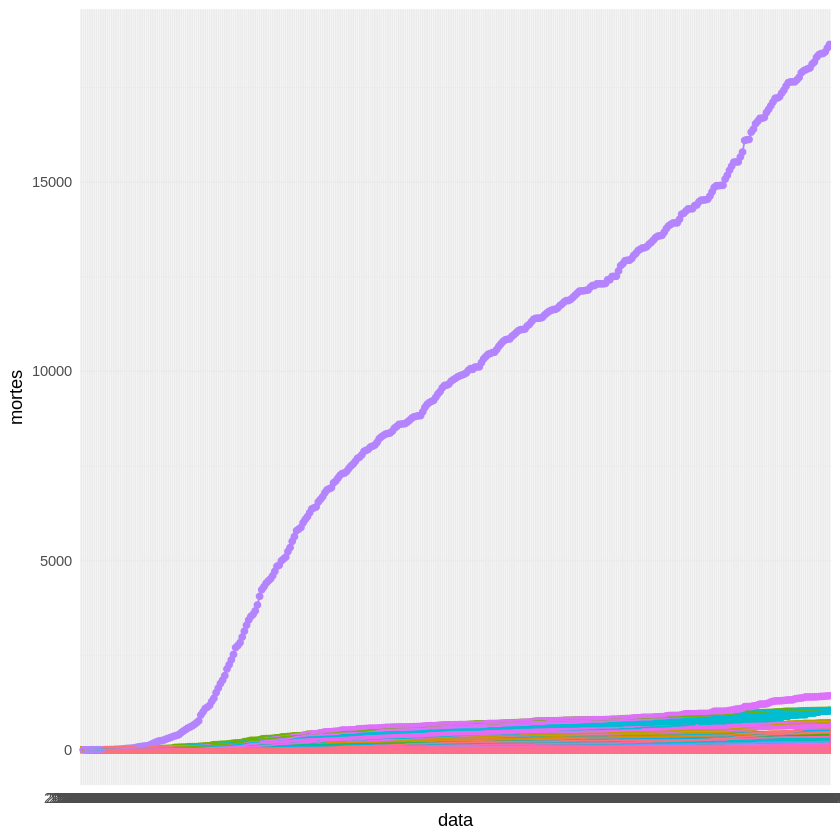

In [18]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muitos dados para um só gráfico, além disso um município é muito maior que os outros. Vamos diminuir o conjunto, selecionando apenas alguns municípios para poder plotar.</p>

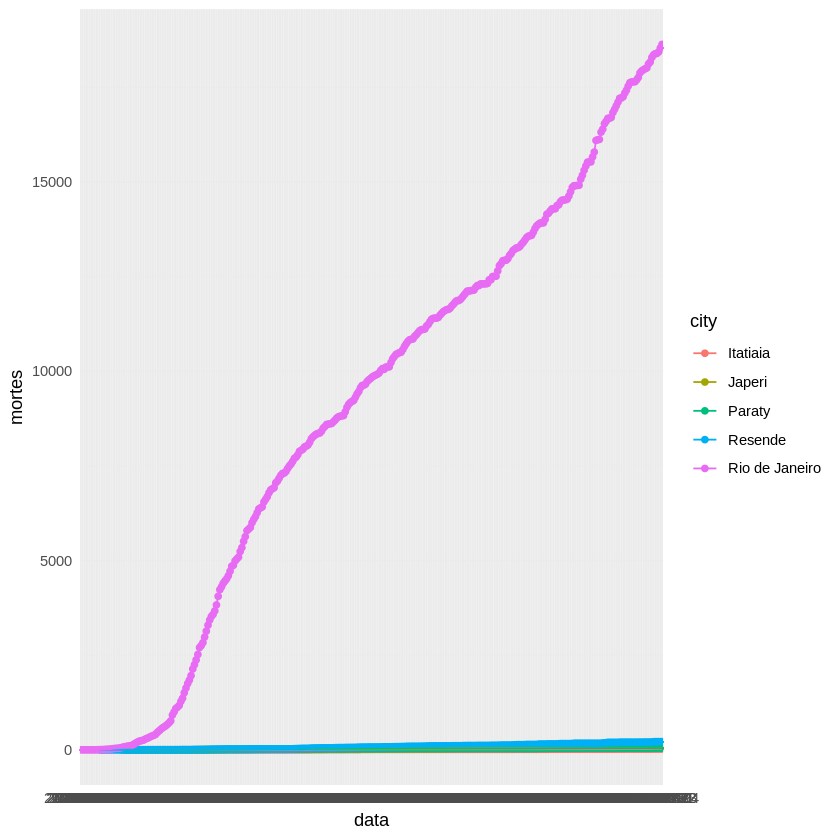

In [19]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Rio de Janeiro", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>O Rio de Janeiro cresce muito mais que os outros municípios, por ser uma região metropolitana. Assim não dá pra ver os outros. Vamos tirar o Rio de Janeiro por enquanto.</p>

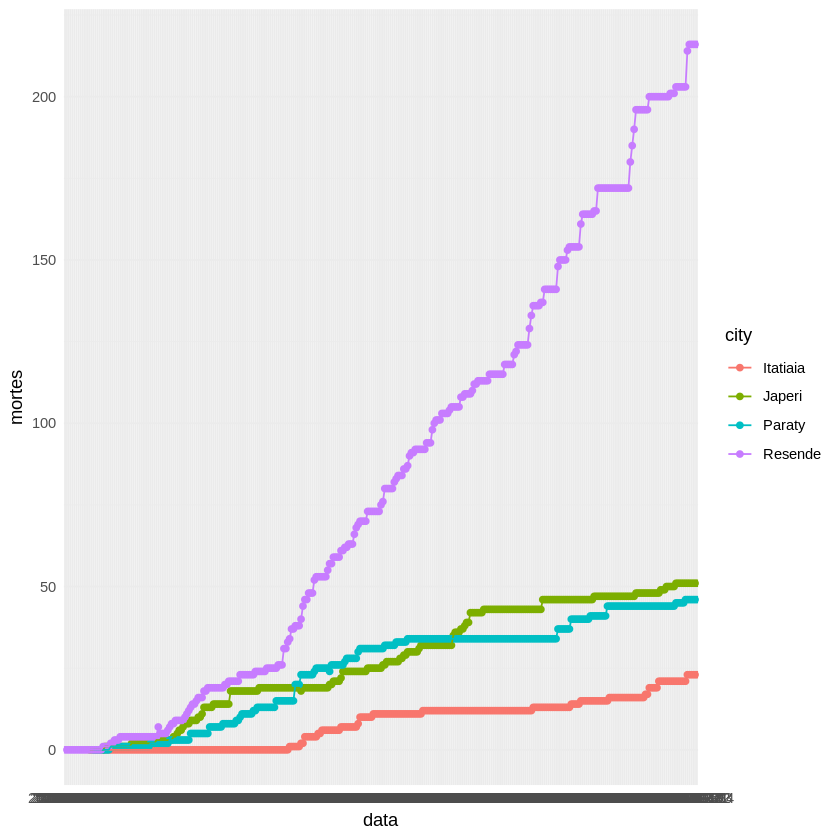

In [20]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>É importante observar que o gráfico só cresce! O dado de mortes é cumulativo!!! Eu não havia percebido isso até agora!</p>
<p>A data na parte de baixo do gráfico também não ficou boa...</p>

<p>Vamos criar um novo atributo com o número de mortes por dia:</p>

In [21]:
dados$deaths_day <- 0

municipios <- sort(unique(dados$city))

for (municipio in municipios) {
  indices <- sort(dados[dados$city == municipio, "order_for_place"])
  acumulado <- 0
  for (indice in indices) {
    mortes_no_dia <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"] - acumulado
    dados[dados$city == municipio & dados$order_for_place == indice, "deaths_day"] <- mortes_no_dia
    acumulado <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"]
  }
}

<p>Em R deve ser possível fazer sem usar dois laços (um <i>for</i> dentro do outro). Ainda vou tentar descobrir como...</p>

<p>Ficou tudo certo? Ficou algum número negativo?</p>

In [22]:
any(dados$deaths_day < 0)

[1] TRUE

<p>Eita! Será que eu errei no código? Vejamos os dados:</p>

In [23]:
dados[dados$deaths_day < 0,]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
829010,2020-08-06,RJ,Angra dos Reis,city,3976,119,129,False,203785,207044,3300100,1920.36475,0.0299,-1
829071,2020-06-05,RJ,Angra dos Reis,city,1081,41,68,False,203785,207044,3300100,522.11124,0.0379,-1
829701,2020-06-07,RJ,Araruama,city,219,28,66,False,132400,134293,3300209,163.07626,0.1279,-1
829807,2021-01-13,RJ,Areal,city,328,9,272,False,12572,12669,3300225,2588.99676,0.0274,-1
830300,2020-07-14,RJ,Armação dos Búzios,city,188,8,92,False,33870,34477,3300233,545.29106,0.0426,-2
830816,2020-11-16,RJ,Barra Mansa,city,3874,181,247,False,184412,184833,3300407,2095.94607,0.0467,-1
830949,2020-07-04,RJ,Barra Mansa,city,567,35,114,False,184412,184833,3300407,306.76340,0.0617,-1
831397,2021-02-14,RJ,Belford Roxo,city,16796,426,322,False,510906,513118,3300456,3273.32115,0.0254,-1
831462,2020-12-09,RJ,Belford Roxo,city,11657,360,257,False,510906,513118,3300456,2271.79713,0.0309,-1
831595,2020-07-28,RJ,Belford Roxo,city,2046,205,124,False,510906,513118,3300456,398.73869,0.1002,-1


<p>Vamos olhar um exemplo e ver os dados originais para um exemplo, o próprio registro e uns antes:</p>

In [24]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67),]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
829700,2020-06-08,RJ,Araruama,city,219,28,67,False,132400,134293,3300209,163.0763,0.1279,0
829701,2020-06-07,RJ,Araruama,city,219,28,66,False,132400,134293,3300209,163.0763,0.1279,-1
829702,2020-06-06,RJ,Araruama,city,163,29,65,False,132400,134293,3300209,121.3764,0.1779,1
829703,2020-06-05,RJ,Araruama,city,160,28,64,False,132400,134293,3300209,119.1425,0.1750,0


<p>Ficou difícil de ver, vamos melhorar isso, vendo só algumas colunas:</p>

In [25]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67), c(1,3,6,7,14)]

,date,city,deaths,order_for_place,deaths_day
829700,2020-06-08,Araruama,28,67,0
829701,2020-06-07,Araruama,28,66,-1
829702,2020-06-06,Araruama,29,65,1
829703,2020-06-05,Araruama,28,64,0


<p>Do dia <i>2020-06-06</i> para o dia <i>2020-06-07</i> alguém ressucitou!!! Aleluia!</p>
<p>Ou os dados não são confiáveis...</p>
<p>Qual o pior caso?</p>

In [26]:
dados[dados$deaths_day == min(dados$deaths_day),]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
843982,2020-12-24,RJ,Niterói,city,22420,675,282,False,513584,515317,3303302,4350.72,0.0301,-111


<p>Cento e onze ressucitaram no mesmo dia! Vamos ver mais detalhes:</p>

In [27]:
dados[dados$city == "Niterói" & dados$order_for_place %in% c(281, 282, 283), c(1,3,6,7,14)]

,date,city,deaths,order_for_place,deaths_day
843981,2020-12-25,Niterói,675,283,0
843982,2020-12-24,Niterói,675,282,-111
843983,2020-12-23,Niterói,786,281,121


<p>Sem muito o que fazer, vou zerar todos os negativos.</p>

In [28]:
dados[dados$deaths_day < 0, "deaths_day"] <- 0

<p>Agora como ficaram os dados?</p>

In [29]:
min(dados$deaths_day)

max(dados$deaths_day)

[1] 0

[1] 307

<p>Nada como um gráfico:</p>

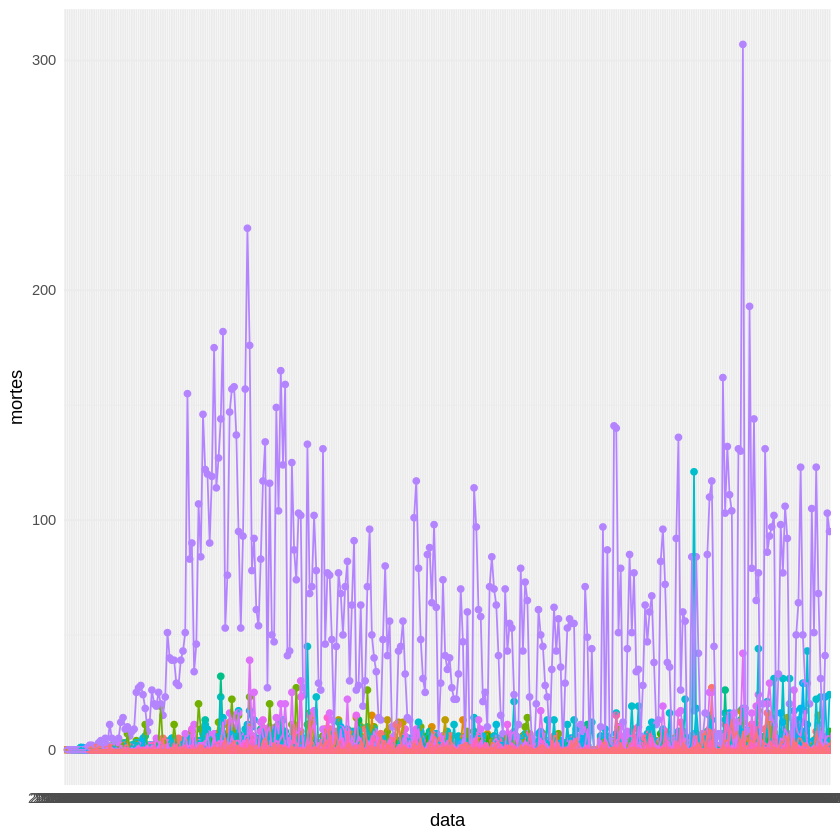

In [30]:
ggplot(dados, aes(x=date, y=deaths_day, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Agora transformar em dados temporais:</p>

In [31]:
# seleciona apenas colunas de interesse
dados <- dados[ , c(1,3,14)]

# atributos e registros
municipios <- sort(unique(dados$city))
datas_ordenadas <- as.character(sort(unique(dados$date)))

# define o formato do conjunto de dados
linhas <- length(datas_ordenadas)
colunas <- length(municipios)

D <- array(0, dim=c(linhas, colunas))

# nomes para as linhas e colunas
rownames(D) <- datas_ordenadas
colnames(D) <- municipios

# dados do numero de mortes de cada municipio para determinada data
for (municipio in municipios) {
  for (data in datas_ordenadas) {
    dado <- 0
    registro <- dados[dados$city==municipio & dados$date == data, ]
    if (nrow(registro) > 0) {
      dado <- dados[dados$city==municipio & dados$date == data, 3]
    }
    D[data, municipio] <- dado
  }
}

<p>Como ficou?</p>

In [32]:
D

,Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
2020-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
